In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
allin_for_analyze = pd.read_csv("../data/allin_for_analyze.csv")

# Analyser le chiffre d’affaires #

## CA / produit ALL ##

In [41]:
# Calcul du CA overall
total_revenue_product = allin_for_analyze['price'] * allin_for_analyze['total_sales']
print(total_revenue_product.sum())

140637.2


## CA/ produit WEB ##

In [29]:
# Filtrer les produits où la valeur de la colonne "onsaleweb" est True
filtered_allin_FA = allin_for_analyze[allin_for_analyze['onsale_web'] == True]

# Calcul du CA pour chaque produit filtré
filtered_allin_FA['total_revenue'] = filtered_allin_FA['price'] * filtered_allin_FA['total_sales']


C:\Users\josse\AppData\Local\Temp\ipykernel_8480\2889598757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_allin_FA['total_revenue'] = filtered_allin_FA['price'] * filtered_allin_FA['total_sales']


In [30]:
print(filtered_allin_FA[['product_id', 'price', 'total_sales', 'total_revenue']])

      product_id  price  total_sales  total_revenue
0           4158   18.5          0.0            0.0
1           4158   18.5          0.0            0.0
2           5826   41.2          4.0          164.8
3           5826   41.2          4.0          164.8
4           5827   55.0          3.0          165.0
...          ...    ...          ...            ...
1416        4115  100.0          0.0            0.0
1417        4108   31.7          2.0           63.4
1418        4108   31.7          2.0           63.4
1419        4138   25.7          6.0          154.2
1420        4138   25.7          6.0          154.2

[1420 rows x 4 columns]


In [135]:
#filtered_allin_FA.to_csv('ca_products_.csv', index=False)
#extract csv pour CA/ produit web ?

## Total chiffre d’affaires réalisé en ligne ##

In [34]:
total_revenue_web = filtered_allin_FA.loc[filtered_allin_FA['onsale_web'] == True, 'total_revenue'].sum()
print("Total chiffre d'affaires des produits en ligne :", total_revenue_web)

Total chiffre d'affaires des produits en ligne : 140637.2


In [38]:
total_revenue_webv2 = filtered_allin_FA['total_revenue'].sum()
print("Total chiffre d'affaires des produits en ligne :", total_revenue_webv2)

Total chiffre d'affaires des produits en ligne : 140637.2


# Analyse sur la variable des erreurs de prix #

## Analyse descriptive ##

In [105]:
print(allin_for_analyze['price'].describe().round(2))

count    1421.00
mean       32.55
std        27.86
min         5.20
25%        14.10
50%        23.60
75%        42.20
max       225.00
Name: price, dtype: float64


In [89]:
print(allin_for_analyze['total_sales'].describe().round(2))

count    1420.00
mean        4.02
std         8.53
min         0.00
25%         0.00
50%         1.00
75%         4.00
max        96.00
Name: total_sales, dtype: float64


In [104]:
# Compter le nombre de produits avec un revenu total de 0
count_zero_revenue = (filtered_allin_FA['total_revenue'] == 0).sum()
print("Nombre de produits avec un revenu total de 0 :", count_zero_revenue)

Nombre de produits avec un revenu total de 0 : 652


## Visualisation des données ##

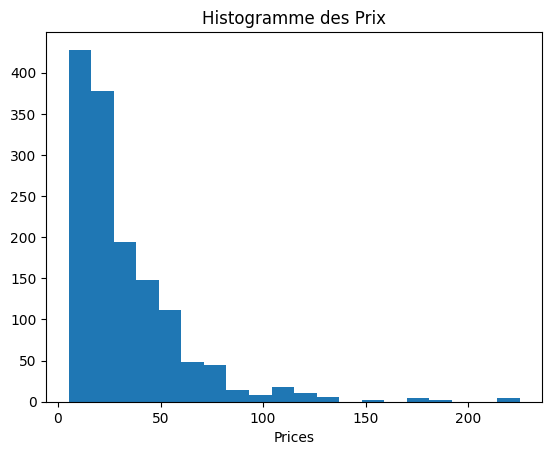

In [132]:
# histogramme
import matplotlib.pyplot as plt
plt.hist(allin_for_analyze['price'], bins=20)
plt.xlabel('Prices')
#plt.ylabel('???')
plt.title('Histogramme des Prix')
plt.show()
#TO DELETE

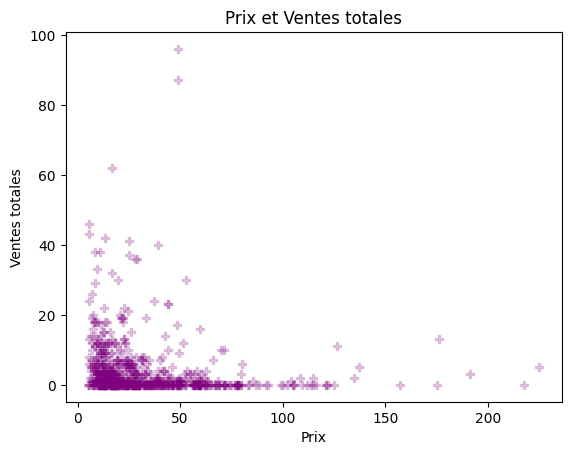

In [103]:
#scatter plot
plt.scatter(allin_for_analyze['price'], allin_for_analyze['total_sales'],
            alpha=0.1, c='purple',marker='P')

plt.title('Prix et Ventes totales')
plt.xlabel('Prix')
plt.ylabel('Ventes totales')
plt.show()

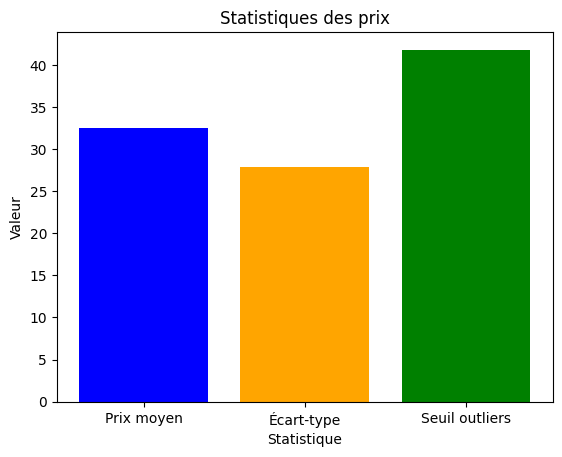

In [133]:
#graphique à barres
stats = {'Prix moyen': mean_price, 'Écart-type': std_price, 'Seuil outliers': threshold}

plt.bar(stats.keys(), stats.values(), color=['blue', 'orange', 'green'])

plt.title('Statistiques des prix')
plt.xlabel('Statistique')
plt.ylabel('Valeur')
plt.show()
#TO DELETE


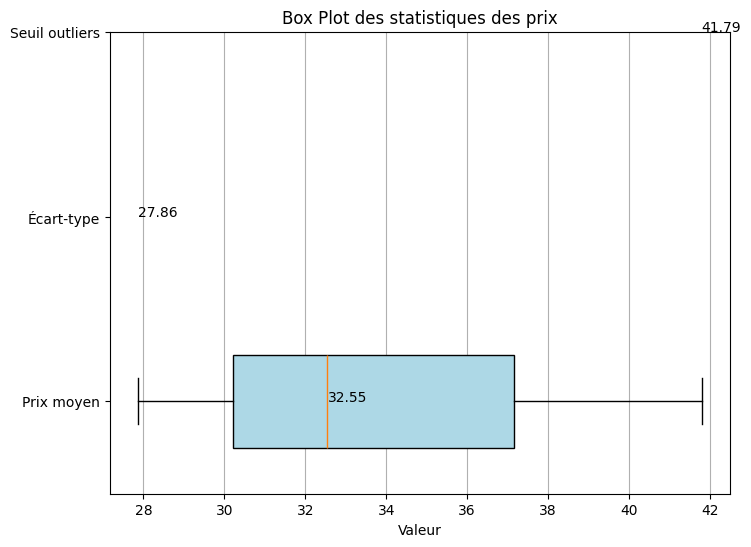

In [122]:

stats_boxplot= pd.DataFrame({'Statistique': ['Prix moyen', 'Écart-type', 'Seuil outliers'],
                         'Valeur': [mean_price, std_price, threshold]})

# box plot
plt.figure(figsize=(8, 6))
plt.boxplot(stats_boxplot['Valeur'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Ajout des étiquettes aux boîtes
for i in range(len(stats_boxplot)):
    plt.text(stats_boxplot['Valeur'][i], i + 1, str(round(stats_boxplot['Valeur'][i], 2)))

plt.title('Box Plot des statistiques des prix')
plt.xlabel('Valeur')
plt.yticks(range(1, len(stats_boxplot) + 1), stats_boxplot['Statistique'])
plt.grid(axis='x')
plt.show()


C:\Users\josse\AppData\Local\Temp\ipykernel_8480\2079129837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=allin_for_analyze['price'], palette=['mistyrose'])


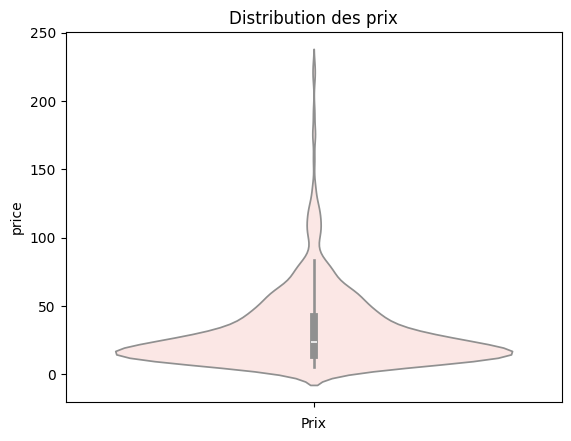

In [110]:
# Création du diagramme en violon
sns.violinplot(data=allin_for_analyze['price'], palette=['mistyrose'])
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.show()


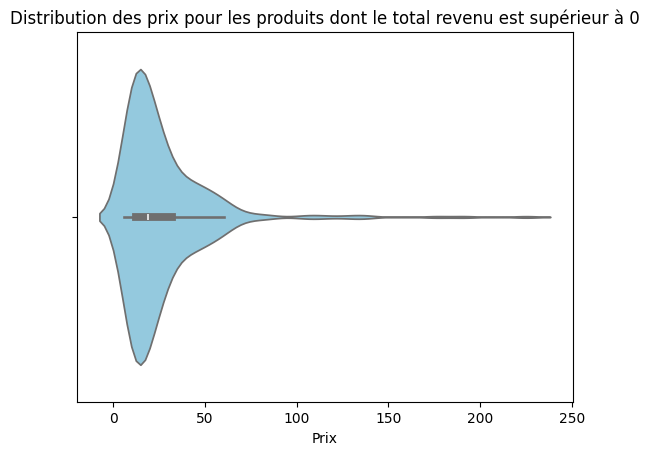

In [134]:
# Filtrer les données pour les produits dont le total revenu est sup à 0
filtered_data_without_zero = filtered_allin_FA[filtered_allin_FA['total_revenue'] > 0]

sns.violinplot(x=filtered_data_without_zero['price'], color='skyblue')

plt.title('Distribution des prix pour les produits dont le total revenu est supérieur à 0')
plt.xlabel('Prix')
plt.show()
#TO DELETE ?

## Détection d'anomalies ##

In [106]:
mean_price = allin_for_analyze['price'].mean()
std_price = allin_for_analyze['price'].std()
threshold = 1.5 * std_price  #l'écart-type x1,5 comme mesure de dispersion pour calculer les outliers
outliers = allin_for_analyze[(allin_for_analyze['price'] < mean_price - threshold) | (allin_for_analyze['price'] > mean_price + threshold)]
print('le prix moyen :', round(mean_price,2))
print('écart_type :', round(std_price,2))
print('écart_type*1,5 :', round(threshold,2))

le prix moyen : 32.55
écart_type : 27.86
écart_type*1,5 : 41.79


In [131]:
# outliers
print("Potential outliers:")
print(outliers)

Potential outliers:
      product_id  onsale_web  price  stock_quantity  stock_status    sku  \
138         5767        True  175.0              12          True  15185   
139         5767        True  175.0              12          True  15185   
192         5025        True  112.0               0          True  13914   
193         5025        True  112.0               0          True  13914   
196         5026        True   86.8               2          True  13913   
...          ...         ...    ...             ...           ...    ...   
1400        4139        True   77.4               7          True  13217   
1407        4132        True   88.4               5          True  11668   
1408        4132        True   88.4               5          True  11668   
1415        4115        True  100.0              11          True  15382   
1416        4115        True  100.0              11          True  15382   

      total_sales            post_date  \
138           0.0  2019-0